In [ ]:

#Importing important libraries and modules
#for data reading and manipulation
import pandas as pd
import numpy as np

#for data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})

#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Modelling
#Train-Test Split
from sklearn.model_selection import train_test_split
#Grid Search for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score,roc_curve, classification_report

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_orig= pd.read_csv("dataset.csv")

In [ ]:
df_orig.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [ ]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


<h1>Data Summary:</h1>
Our email campaign dataset have 68353 observations and 12 features. Clearly Email_Status is our target variable.

<h1> Our features:

Email Id - It contains the email id's of the customers/individuals

Email Type - There are two categories 1 and 2. We can think of them as marketing emails or important updates, notices like emails regarding the business.

Subject Hotness Score - It is the email's subject's score on the basis of how good and effective the content is.

Email Source - It represents the source of the email like sales and marketing or important admin mails related to the product.

Email Campaign Type - The campaign type of the email.

Total Past Communications - This column contains the total previous mails from the same source, the number of communications had.

Customer Location - Contains demographical data of the customer, the location where the customer resides.

Time Email sent Category - It has three categories 1,2 and 3; the time of the day when the email was sent, we can think of it as morning, evening and night time slots.

Word Count - The number of words contained in the email.

Total links - Number of links in the email.

Total Images - Number of images in the email.

Email Status - Our target variable which contains whether the mail was ignored, read, acknowledged by the reader.

<h1> Data preprocessing and cleaning

In [ ]:

#get the num of nulls in each column
df_orig.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

We will handle null va;ues of column- (Customer Location) later , since it is a categorical column

Lets handle null values of Total_Images, Total_Status , Total_Past_Communications

<Axes: ylabel='Density'>

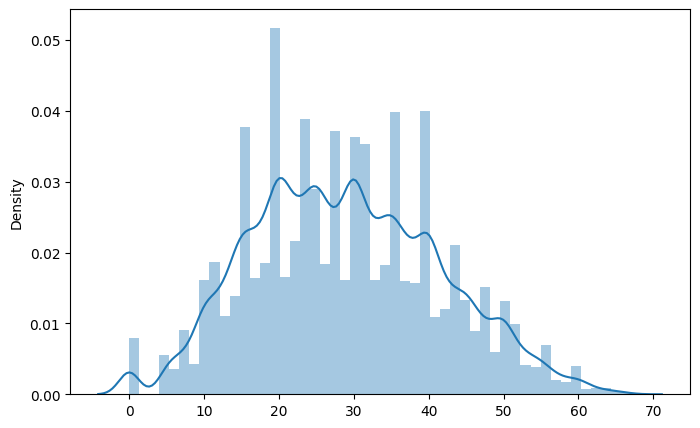

In [ ]:

#let's see the distribution of Total Past Communications to get what majority of the data tends to so that we can fill it accordingly
sns.distplot(x=df_orig['Total_Past_Communications'], hist = True)

In [ ]:
#since its a normal distribution , we will use mean to fill up the null values for total past comm
df_orig['Total_Past_Communications'].fillna(df_orig['Total_Past_Communications'].mean(), inplace = True)

<Axes: ylabel='Density'>

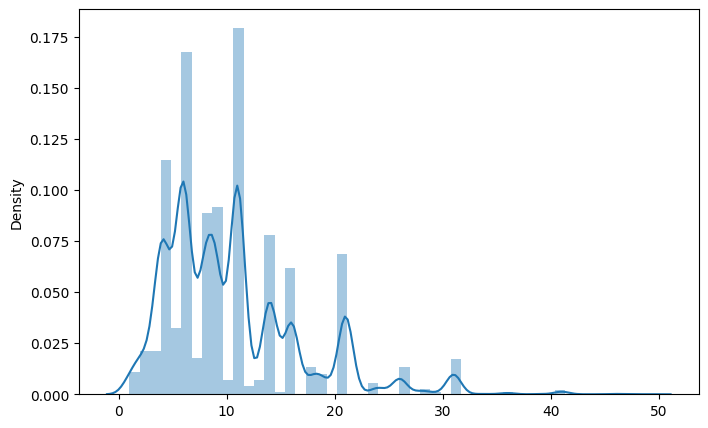

In [ ]:

#let's see the distribution of Total Links to get what majority of the data tends to so that we can fill it accordingly
sns.distplot(x=df_orig['Total_Links'], hist= True)

In [ ]:
# most of the values are between 5-12 and the distribution is skewed on the right
#so will fill up the null values with mode
df_orig['Total_Links'].fillna(df_orig['Total_Links'].mode()[0], inplace = True)

<Axes: ylabel='Density'>

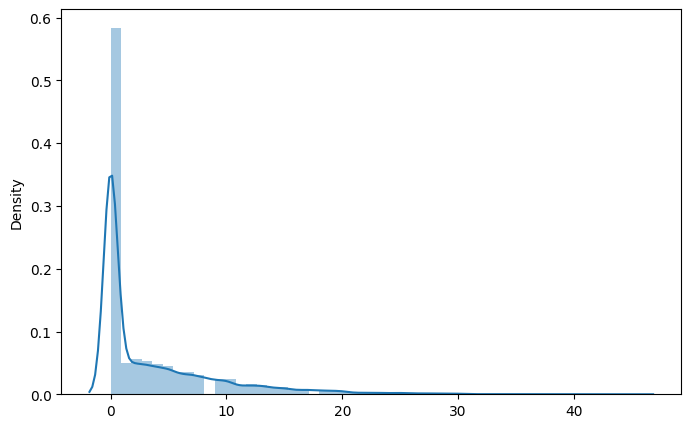

In [ ]:

#total image distribution
sns.distplot(x=df_orig['Total_Images'], hist=True)

In [ ]:
#graph is right skewed , so will replace null values wth mode
#filling up the Total Images Column
df_orig['Total_Images'].fillna(df_orig['Total_Images'].mode()[0], inplace = True)

In [ ]:

#check for duplicates
df_orig.duplicated().sum()

0

<h1>eda

Categorical variables

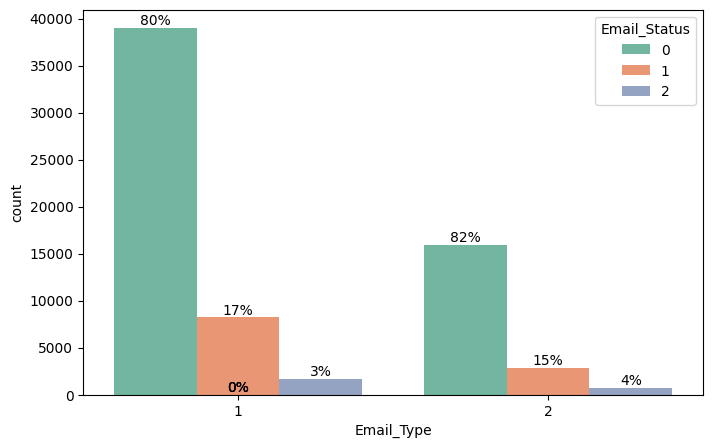

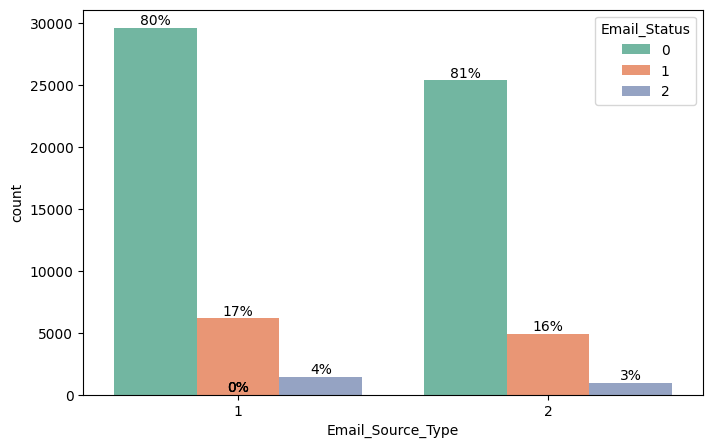

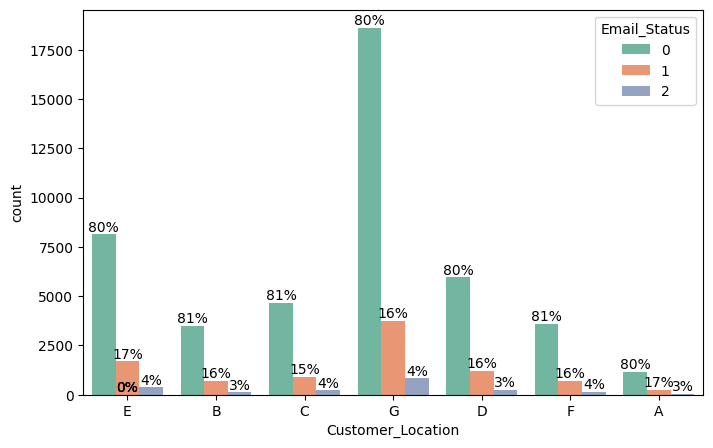

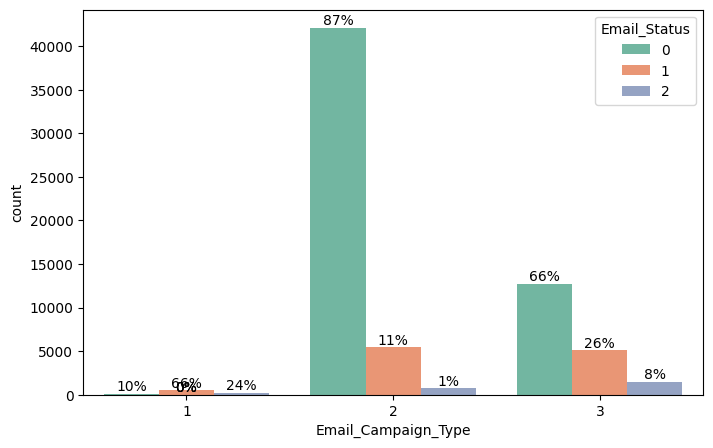

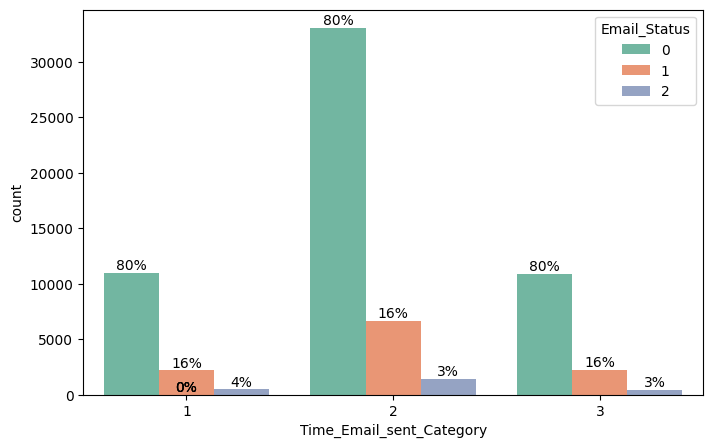

In [ ]:
categorical_variables = ['Email_Type','Email_Source_Type','Customer_Location','Email_Campaign_Type','Time_Email_sent_Category']
Target_var = ['Email_Status']


for i,value in enumerate(categorical_variables):
  ax = sns.countplot(x=df_orig[value], hue=df_orig[Target_var[0]] , palette='Set2')
  unique = len([x for x in df_orig[value].unique() if x==x])
  bars = ax.patches
  for i in range(unique):
      catbars=bars[i:][::unique]
      #get height
      total = sum([x.get_height() for x in catbars])
      #print percentage
      for bar in catbars:
        ax.text(bar.get_x()+bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")
  plt.show()

<h1>  INSIGHT 1

In the Email Campaign Type feature, it seems like in campaign type 1 very few emails were sent but has a very high likelihood of getting read. Most emails were sent under email campaign type 2 and most ignored. For campaign 3 , it performed better than campaign 2 in terms of percentage of mail being read and acknowledged.


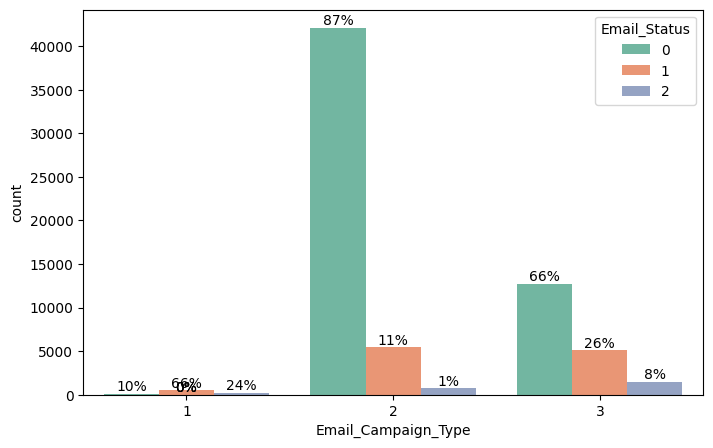

In [ ]:
# Plot countplot for 'Email_Campaign_Type' only
ax = sns.countplot(x=df_orig['Email_Campaign_Type'], hue=df_orig['Email_Status'], palette='Set2')
unique = len([x for x in df_orig['Email_Campaign_Type'].unique() if x==x])
bars = ax.patches
for i in range(unique):
    catbars = bars[i:][::unique]
    total = sum([x.get_height() for x in catbars])
    for bar in catbars:
        ax.text(bar.get_x() + bar.get_width()/2., bar.get_height(), f'{bar.get_height()/total:.0%}', ha="center", va="bottom")
plt.show()

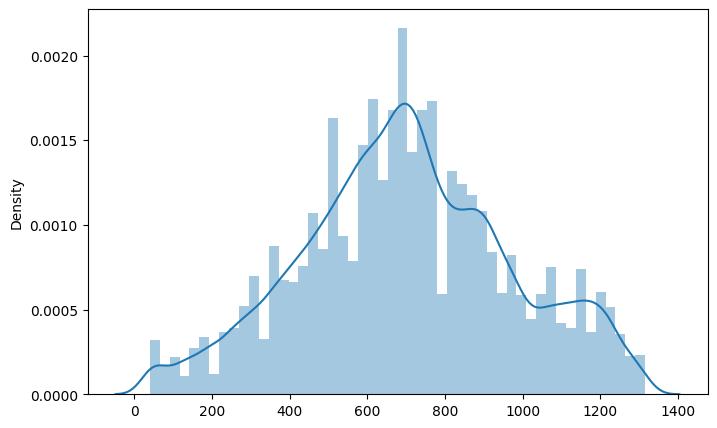

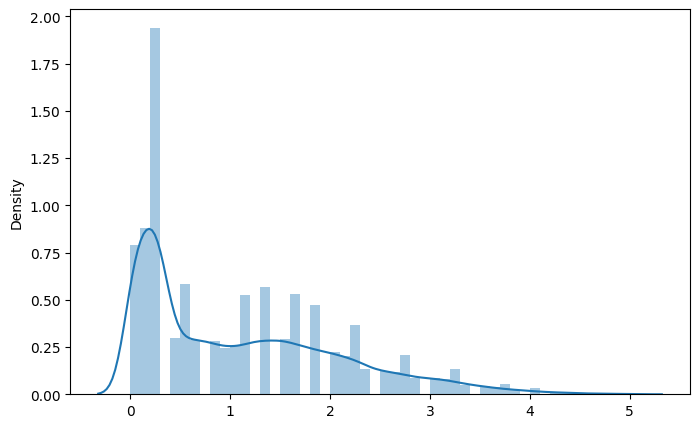

In [ ]:
#continuous variables
#distribution of other continuous features and understanding where the data tends to
cont_var = ['Word_Count','Subject_Hotness_Score']
for i, value in enumerate(cont_var):
 sns.distplot(x=df_orig[value], hist = True)
 plt.show()

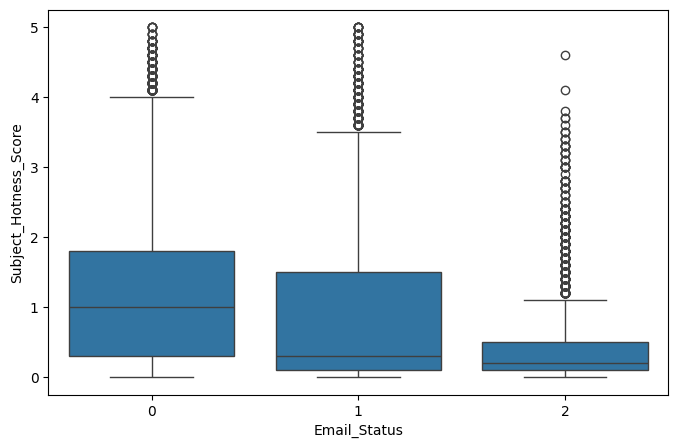

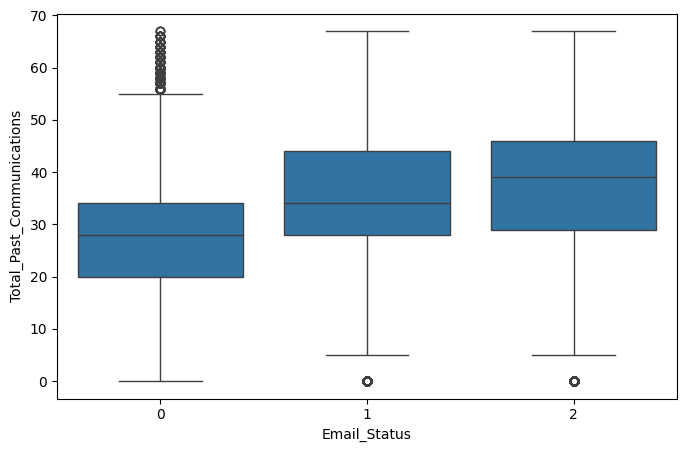

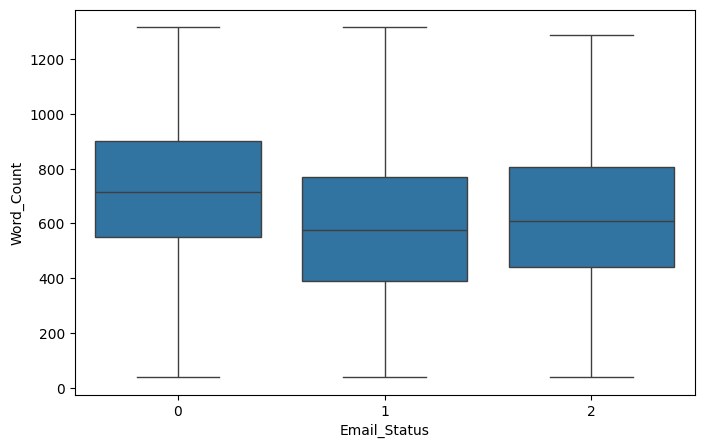

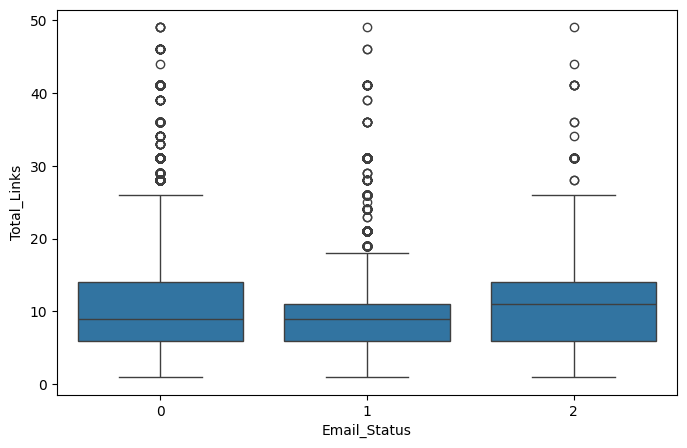

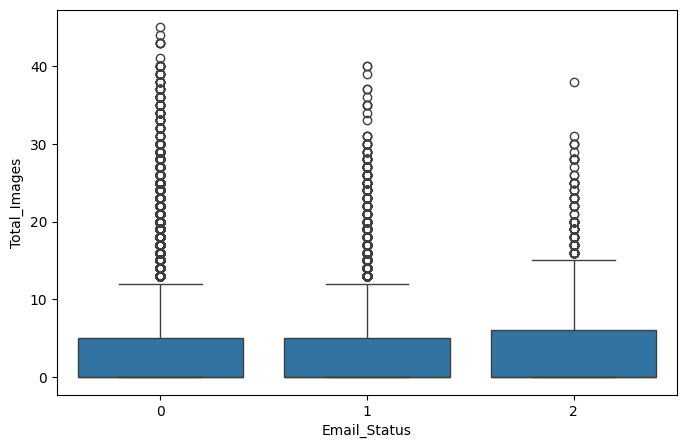

In [ ]:

#continuous variables through boxplots
cont_var = ['Subject_Hotness_Score', 'Total_Past_Communications','Word_Count','Total_Links','Total_Images']
for i, value in enumerate(cont_var):
 sns.boxplot(x=df_orig['Email_Status'], y= df_orig[value])
 plt.show()

<h1> INSIGHT 2

Emails with more words are likely to get ignored.
Emails with less number of words get read or acknowledged

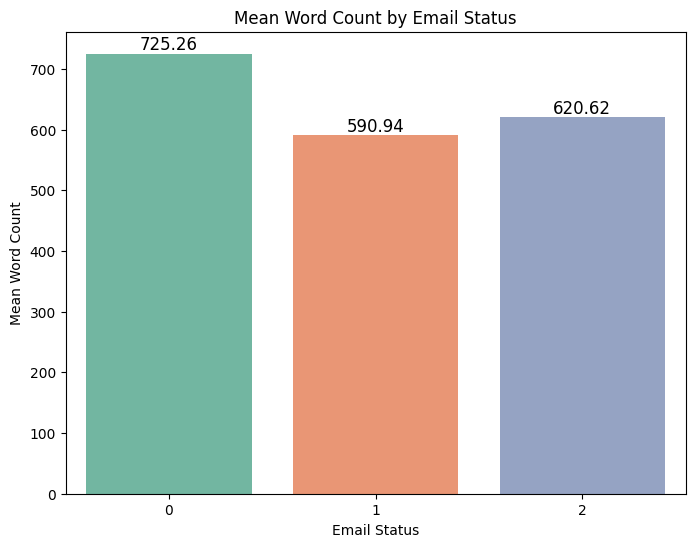

In [ ]:
# Group by 'Email_Status' and calculate the mean word count
mean_word_count = df_orig.groupby('Email_Status')['Word_Count'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Email_Status', y='Word_Count', data=mean_word_count, palette='Set2')
plt.xlabel('Email Status')
plt.ylabel('Mean Word Count')
plt.title('Mean Word Count by Email Status')

# Add y-values on top of each bar
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2., bar.get_height(), f'{bar.get_height():.2f}',
            ha='center', va='bottom', color='black', fontsize=12)

plt.show()


<h1> INSIGHT 3

If  the chart indicates that emails that are acknowledged (status 2) have the highest average number of past communications, followed by those that are read (status 1), and lastly, those that are ignored (status 0). This trend might suggest that increased engagement, could be correlated with a higher number of past communications, implying that repeated interaction may lead to more active responses.

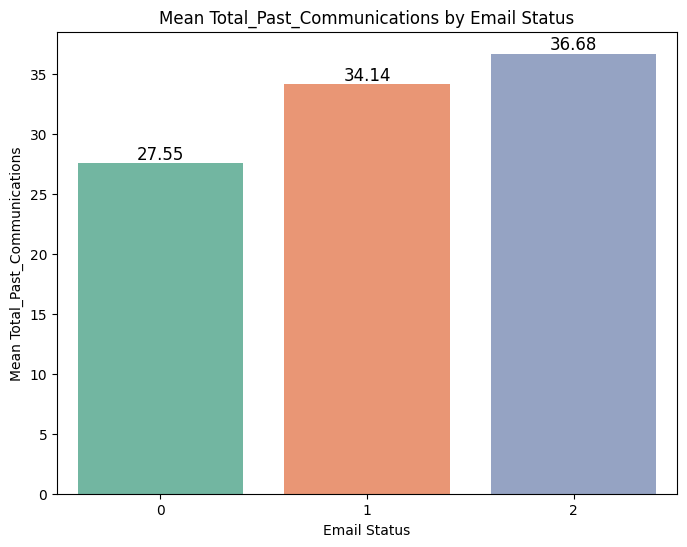

In [ ]:
# Group by 'Email_Status' and calculate the mean word count
mean_word_count = df_orig.groupby('Email_Status')['Total_Past_Communications'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Email_Status', y='Total_Past_Communications', data=mean_word_count, palette='Set2')
plt.xlabel('Email Status')
plt.ylabel('Mean Total_Past_Communications')
plt.title('Mean Total_Past_Communications by Email Status')

# Add y-values on top of each bar
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2., bar.get_height(), f'{bar.get_height():.2f}',
            ha='center', va='bottom', color='black', fontsize=12)

plt.show()


<h1> INSIGHT 4

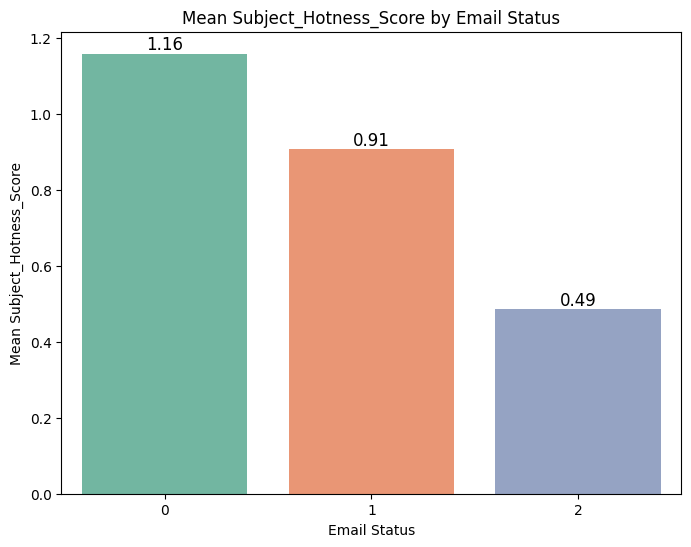

In [ ]:
# Group by 'Email_Status' and calculate the mean word count
mean_word_count = df_orig.groupby('Email_Status')['Subject_Hotness_Score'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Email_Status', y='Subject_Hotness_Score', data=mean_word_count, palette='Set2')
plt.xlabel('Email Status')
plt.ylabel('Mean Subject_Hotness_Score')
plt.title('Mean Subject_Hotness_Score by Email Status')

# Add y-values on top of each bar
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2., bar.get_height(), f'{bar.get_height():.2f}',
            ha='center', va='bottom', color='black', fontsize=12)

plt.show()


<h1>INSIGHT 5

Lower the subject hotness score , more is the chance of it being read or acknowledged

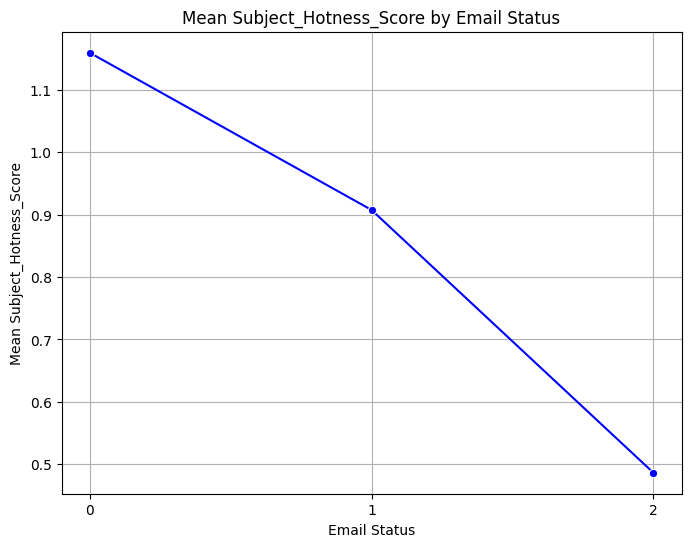

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'Email_Status' and calculate the mean word count
mean_word_count = df_orig.groupby('Email_Status')['Subject_Hotness_Score'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(8, 6))
sns.lineplot(x='Email_Status', y='Subject_Hotness_Score', data=mean_word_count, marker='o', color='blue')
plt.xlabel('Email Status')
plt.ylabel('Mean Subject_Hotness_Score')
plt.title('Mean Subject_Hotness_Score by Email Status')
plt.grid(True)  # Add grid lines

# Set the x-axis tick labels
plt.xticks(mean_word_count['Email_Status'])

plt.show()


In [ ]:
df_orig.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [ ]:
df_orig.drop('Customer_Location' , axis=1).head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,3,18.0,2,947,4.0,0.0,0


In [ ]:
df_orig.drop('Email_ID' , axis=1).head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


<h1> Handling categorical data

In [ ]:
# Assuming df is your DataFrame and cat_cols is a list of the names of categorical columns
cat_cols = ['Email_Type', 'Email_Source_Type', 'Email_Campaign_Type', 'Time_Email_sent_Category']

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df_orig, columns=cat_cols)

In [ ]:
df_encoded.head()

,Email_ID,Subject_Hotness_Score,Customer_Location,Total_Past_Communications,Word_Count,Total_Links,Total_Images,Email_Status,Email_Type_1,Email_Type_2,Email_Source_Type_1,Email_Source_Type_2,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3
0,EMA00081000034500,2.2,E,33.0,440,8.0,0.0,0,True,False,False,True,False,True,False,True,False,False
1,EMA00081000045360,2.1,NaN,15.0,504,5.0,0.0,0,False,True,True,False,False,True,False,False,True,False
2,EMA00081000066290,0.1,B,36.0,962,5.0,0.0,1,False,True,True,False,False,False,True,False,True,False
3,EMA00081000076560,3.0,E,25.0,610,16.0,0.0,0,True,False,False,True,False,True,False,False,True,False
4,EMA00081000109720,0.0,C,18.0,947,4.0,0.0,0,True,False,False,True,False,False,True,False,True,False


<h1> Handling Numerical Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame and num_cols is a list of the names of numerical columns
num_cols = ['Subject_Hotness_Score', 'Total_Past_Communications', 'Word_Count', 'Total_Links' , 'Total_Images']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize numerical columns
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

In [ ]:
df_encoded.drop(['Email_ID' , 'Customer_Location'], axis=1,  inplace=True)

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Subject_Hotness_Score       68353 non-null  float64
 1   Total_Past_Communications   68353 non-null  float64
 2   Word_Count                  68353 non-null  float64
 3   Total_Links                 68353 non-null  float64
 4   Total_Images                68353 non-null  float64
 5   Email_Status                68353 non-null  int64  
 6   Email_Type_1                68353 non-null  bool   
 7   Email_Type_2                68353 non-null  bool   
 8   Email_Source_Type_1         68353 non-null  bool   
 9   Email_Source_Type_2         68353 non-null  bool   
 10  Email_Campaign_Type_1       68353 non-null  bool   
 11  Email_Campaign_Type_2       68353 non-null  bool   
 12  Email_Campaign_Type_3       68353 non-null  bool   
 13  Time_Email_sent_Category_1  683

<h1> Splitting dataset

In [ ]:
X = df_encoded.drop('Email_Status' , axis=1)
y = df_encoded['Email_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<h1> Running different classification algorithm

Decision tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9988844592370433
Testing Accuracy: 0.7111403701265453


Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
clf = RandomForestClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9988844592370433
Testing Accuracy: 0.8025747933582035


XG boost

In [ ]:
import xgboost as xgb

# Initialize the XGBoost classifier
clf = xgb.XGBClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.8381368640503274
Testing Accuracy: 0.8150830224562944


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
clf = KNeighborsClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.8368018726454775
Testing Accuracy: 0.797088727964304


Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
clf = LogisticRegression()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.8098825939065871
Testing Accuracy: 0.8117182356813694


SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVM classifier
clf = SVC()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.8115101861672945
Testing Accuracy: 0.8111330553726868


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "XGBoost": xgb.XGBClassifier()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    # Train the classifier on the training data
    clf.fit(X_train, y_train)

    # Make predictions on the training and testing data
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Calculate training and testing accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Print results
    print(f"{name}:")
    print("  Training Accuracy:", train_accuracy)
    print("  Testing Accuracy:", test_accuracy)
    print()
